데이터 사이언스 스쿨의 추천 시스템 항목 참고
https://datascienceschool.net/03%20machine%20learning/07.01%20%EC%B6%94%EC%B2%9C%20%EC%8B%9C%EC%8A%A4%ED%85%9C.html

# **Surprise 패키지**
파이썬의 Surprise패키지는 다양한 추천 시스템 알고리즘을 제공한다.

In [2]:
!pip install surprise

     |████████████████████████████████| 11.8MB 6.1MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617543 sha256=98945a60e0dca3d10b36140e6f3a68b5004fbde008f29d0b4cd4e04ef1bfe33d
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [6]:
import surprise
import pandas as pd

# **평점 데이터**
surprise 패키지는 MovieLense라는 영화 추천 웹사이트의 데이터를 샘플 평점 데이터를 제공한다

In [4]:
data = surprise.Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [7]:
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rate", "id"])
del df["id"]
df.head(10)

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0
5,298,474,4.0
6,115,265,2.0
7,253,465,5.0
8,305,451,3.0
9,6,86,3.0


In [8]:
df_table = df.set_index(["user", "item"]).unstack()
df_table.shape

(943, 1682)

이 평점 행렬의 일부만 살펴보면 평점 데이터가 일부 위치에만 존재하는 sparse 행렬임을 알 수 있음

In [9]:
df_table.iloc[212:222, 808:817].fillna("")

rate                                
item  211 212 213 214 215 216 217 218 219
user                                     
290     3                   4       2    
291         4       4   4           4   4
292                 3                    
293     4       3       4   4   3   2    
294                                      
295             5       5   5   4   5    
296     4                                
297     4       3       2   4       3    
298     5       3       5                
299     4   4   5           5

In [13]:
import matplotlib.pyplot as plt

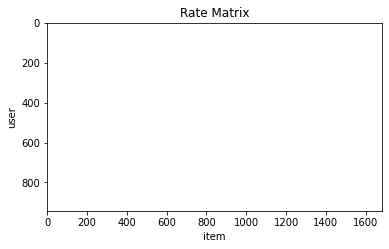

In [14]:
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("item")
plt.ylabel("user")
plt.title("Rate Matrix")
plt.show()

# 왜 점이 안찍히지??

# **추천 시스템 알고리즘**
1. 협업 필터링 (Collaborative Filtering)
- 1-1. Neighborhood Models
  - User-Based CF
  - Item-Based CF
- 1-2. Latent Factor Models
  - Matrix Factorization
  - SVD
2. 컨텐츠 기반 추천 (Content-Based Recommendation)

## 모형 사용법
베이스라인 모형을 비롯한 surprise 패키지 모형을 사용하기 위해서는 다음과 같은 순서를 거친다.

1. 데이터세트의 split, folds 메소드를 사용하여 K-Fold 트레이닝 데이터셋과 테스트 데이터셋을 만든다.

2. 모형 알고리즘 객체를 생성한다.

3. 모형 알고리즘 객체의 train 메서드와 트레이닝 데이터셋으로 모수를 추정한 후, test 메서드로 테스트 데이터셋에 대한 예측을 실시한다.

4. accuracy 서브패키지의 성능평가 함수를 사용하여 예측 성능을 계산한다.

이 과정은 evaluate 명령으로 단축할 수도 있다.



## 추천성능 평가기준
accuracy 서브패키지에서는 다음과 같은 추천성능 평가기준을 제공한다.

- RMSE (Root Mean Squared Error)

- MAE (Mean Absolute Error)

- FCP (Fraction of Concordant Pairs) 

회귀 분석에서 i번째 데이터와 j번째 데이터에 대해 실제 데이터 y<sub>i</sub>,y<sub>j</sub>와 예측 데이터 y^<sub>i</sub>,y^<sub>j</sub> 사이의 증가 방향이 같으면 condordant pair라고 한다.



In [16]:
from surprise.model_selection import cross_validate

## Collaborative Filter
CF(Collaborative Filter) 방법은 모든 사용자의 데이터를 균일하게 사용하는 것이 아니라 평점 행렬이 가진 특정한 패턴을 찾아서 이를 평점 예측에 사용하는 방법이다. CF 방법도 사용자나 상품 기준으로 평점의 유사성을 살피는 Neighborhood 모형과 행렬의 수치적 특징을 이용하는 Latent Factor 모형이 있다.



### Neighborhood 모형
Neighborhood 모형은 Memory-based CF라고도 한다. 이 방법은 특정 사용자의 평점을 예측하기 위해 사용하는 것이아니라 해당 사용자와 유사한(similar) 사용자에 대해 가중치를 준다.

특히 해당 사용자와 유사한 사용자를 찾는 방법 즉, 평점 행렬에서 유사한 사용자 행 벡터를 찾아서 이를 기반으로 빈 데이터를 계산하는 방법을 사용자 기반 (User-based) CF라고 한다.

이와 달리 특정한 상품에 대해 사용자가 준 점수 즉, 평점 행렬의 상품 열 벡터의 유사성을 찾고 특정 상품과 유사한 평점 정보를 가지는 상품들로 해당 상품의 빈 데이터를 예측하는 방법을 상품 기반 (Item-based) CF라고 한다.



#### 유사도 계산
사용자 특성 벡터(평점 행렬의 행 벡터)이나 상품 특성 벡터(평점 행렬의 열 벡터)의 유사도(similarity)을 비교하기 위한 기준도 여러가지가 있을 수 있다.

surprise 패키지에서는 다음과 같은 유사도 기준을 제공한다.

- 평균제곱차이 유사도 (Mean Squared Difference Similarity)

- 코사인 유사도 (Cosine Similarity)

- 피어슨 유사도 (Pearson Similarity)

- 피어슨-베이스라인 유사도 (Pearson-Baseline Similarity)

surprise 패키지의 유사도 설정 옵션은 다음과 같다.

- name: 사용할 유사도의 종류를 나타내는 문자열. 디폴트는 'MSD'.

- user_based: True면 사용자 기반, False면 상품 기반.

- min_support: 두 사용자나, 상품에서 공통적으로 있는 평점 원소의 수의 최솟값. 공통 평점 원소의 수가 이 값보다 적으면 해당 벡터는 사용하지 않는다. 디폴트는

- shrinkage: Shrinkage 가중치. 디폴트는 100.

**평균제곱차이(Mean Squared Difference, MSD)**유사도는 유클리드 공간에서의 거리 제곱에 비례하는 값이다.

In [17]:
sim_options = {'name': 'msd'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


0.7725553185529976

**코사인 유사도(Cosine Similarity)**는 두 특성 벡터의 각도에 대한 코사인 값을 말한다. 벡터 x와 벡터 y 사이의 각도 θ 는 두 벡터의 내적 x⋅y와 다음과 같은 관계가 있다. 각도 θ가 0도이면 코사인 유사도는 1이다. 반대로 각도 θ가 90도이면 코사인 유사도는 0이다.

In [18]:
sim_options = {'name': 'cosine'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


0.804580222759629

**피어슨 유사도(Pearson Similarity)**는 두 벡터의 상관계수(Pearson correlation coefficient)를 말한다

In [19]:
sim_options = {'name': 'pearson'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


0.8041355708004616

**피어슨-베이스라인 유사도(Pearson-Baseline Similarity)**는 피어슨 유사도와 같이 상관계수를 구하지만 각 벡터의 기댓값을 단순 평균이 아니라 베이스라인 모형에서 예측한 값을 사용한다.

In [20]:
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.7913835668181246

#### KNN 가중치 예측 방법
일단 유사도가 구해지면 평점을 예측하고자 하는 사용자(또는 상품)와 유사도가 큰 k개의 사용자(또는 상품) 벡터를 사용하여 가중 평균을 구해서 가중치를 예측한다. 이러한 방법을 KNN(K Nearest Neighbors) 기반 예측 방법이라고 한다.

surprise 패키지에서는 다음과 같은 3가지의 KNN 기반 가중치 예측 알고리즘 클래스를 제공한다.

- KNNBasic
  - 평점들을 단순히 가중 평균한다.
- KNNWithMeans
  - 평점들을 평균값 기준으로 가중 평균한다.
- KNNBaseline
  - 평점들을 베이스라인 모형의 값 기준으로 가중 평균한다.

In [21]:
# 평균값 기준으로 가중 평균
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNWithMeans(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.7310038240960768

In [22]:
# 베이스라인 모형의 값 기준으로 가중 평균
sim_options = {'name': 'pearson_baseline'}
algo = surprise.KNNBaseline(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


0.7214023017301179

### Latent Factor 모형
사용자의 특성 벡터나 상품의 특성 벡터의 길이는 수천에서 수십억에 달하는 긴 크기가 될 수도 있다.

Latent Factor 모형은 이렇게 긴 사용자 특성이나 상품 특성을 몇 개의 요인 벡터로 간략화(approximate)할 수 있다는 가정에서 출발한 모형이다.
PCA(Principle Component Analysis)를 사용하면 긴 특성 벡터를 소수의 차원으로 차원 축소할 수 있듯이 사용자의 특성도 차원 축소 할 수 있다.

영화에 대한 평점을 주는 경우, 코미디, 액션, 드라마 등 몇개의 장르 요인이 있어서 사용자는 특정한 장르 요소에 대해 더 점수를 많이 주거나 적게 줄 수 있다. 그리고 영화 자체도 이러한 장르 요인을 가지고 있다면 해당 사용자의 그 영화에 대한 평점은 사용자의 장르 요인 벡터와 영화의 장르 요인 벡터의 내적으로 표시할 수 있다.

#### Matrix Factorization

Matrix Factorization 방법은 모든 사용자와 상품에 대해 다음 오차 함수를 최소화하는 요인 벡터를 찾아낸다. 즉 다음과 같은 행렬 P, Q를 찾는다.

R≈PQ<sup>T</sup>

여기에서

R∈R<sup>m×n</sup> : m 사용자와 n 상품의 평점 행렬

P∈R<sup>m×k</sup> : m 사용자와 k 요인의 관계 행렬

Q∈R<sup>n×k</sup> : n 상품과 k 요인의 관계 행렬






#### SVD (Singular Value Decomposition)
SVD (Singular Value Decomposition) 는 Matrix Factorization 문제를 푸는 방법 중 하나이다.

m×n 크기의 행렬 R은 다음과 같이 세 행렬의 곱으로 나타낼 수 있다. 이를 특이치 분해(Singular Value Decomposition) 라고 한다.

R=UΣV<sup>T</sup>




In [25]:
%%time
algo = surprise.SVD(n_factors=100)
print(cross_validate(algo, data)["test_mae"].mean())

0.7377587448833791
CPU times: user 27.1 s, sys: 55 ms, total: 27.2 s
Wall time: 27.3 s


#### NMF(Non-negative matrix factorization)

In [24]:
%%time
algo = surprise.NMF(n_factors=100)
print(cross_validate(algo, data)["test_mae"].mean())

CPU times: user 1min 27s, sys: 158 ms, total: 1min 27s
Wall time: 1min 27s
